In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Import function OutcropTrace
import sys, os
sys.path.append(os.path.abspath('../functions'))
from OutcropTrace import OutcropTrace # old api
from enu2sdp import enu2sdp             # new api
from outcrop_trace import outcrop_trace # new api

In [2]:
# Read the DEM grid
XG = np.loadtxt(os.path.abspath('../data/ch5-3/XG.txt'))
YG = np.loadtxt(os.path.abspath('../data/ch5-3/YG.txt'))
ZG = np.loadtxt(os.path.abspath('../data/ch5-3/ZG.txt'))

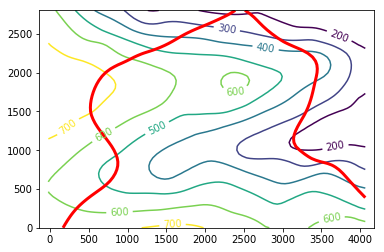

In [3]:
# old api. OutcropTrace usage 
# Contour the terrain
cval = np.linspace(200,700,6)
cp = plt.contour(XG,YG,ZG,cval)
plt.clabel(cp, inline=True, fontsize=10, fmt="%d")

# Western contact
pi = np.pi
strike = 20*pi/180
dip = 22*pi/180
point2 = np.array([692, 1212, 600])
DG = OutcropTrace(strike,dip,point2,XG,YG,ZG)
cval = 0 # Contour only CG zero value
cp = plt.contour(XG,YG,DG,cval,colors='red',linewidths=3)

# Eastern contact
strike = 160*pi/180
dip = 22*pi/180
pointy = np.array([3203, 1031, 200])
DG = OutcropTrace(strike,dip,pointy,XG,YG,ZG)
cp = plt.contour(XG,YG,DG,cval,colors='red',linewidths=3)

# Make axes equal
plt.axis('equal');

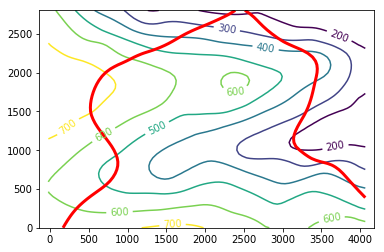

In [4]:
# Contour the terrain
cval = np.linspace(200,700,6)
cp = plt.contour(XG,YG,ZG,cval)
plt.clabel(cp, inline=True, fontsize=10, fmt="%d")

w_strike, w_dip = np.radians([20, 22])
e_strike, e_dip = np.radians([160, 22])

WT = enu2sdp(w_strike, w_dip)
ET = enu2sdp(e_strike, e_dip)
XYZ = np.stack([XG, YG, ZG], axis=-1) # stack 2D arrays over third axis (-1 means last)

cval = 0 # Contour only CG zero value
wp = np.array([692, 1212, 600])  # Western contact
ep = np.array([3203, 1031, 200]) # Eastern contact

W_DG = outcrop_trace(WT, wp, XYZ)
E_DG = outcrop_trace(ET, ep, XYZ)

cp = plt.contour(XG, YG, W_DG, cval, colors='red', linewidths=3)
cp = plt.contour(XG, YG, E_DG, cval, colors='red', linewidths=3)

# Make axes equal
plt.axis('equal');